# Multiple Layer GRU / 1d Convolutonal Layer (IMDB Suwbwords 8k vocabulary)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [2]:
# fix for Cuda Memory Growth issue
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
#train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 85ms/step - loss: 0.4432 - accuracy: 0.7862 - val_loss: 0.3025 - val_accuracy: 0.8788
Epoch 2/10
391/391 [==============================] - 20s 52ms/step - loss: 0.2190 - accuracy: 0.9182 - val_loss: 0.2997 - val_accuracy: 0.8787
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1702 - accuracy: 0.9373 - val_loss: 0.3165 - val_accuracy: 0.8749
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1333 - accuracy: 0.9530 - val_loss: 0.3728 - val_accuracy: 0.8678
Epoch 5/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1109 - accuracy: 0.9617 - val_loss: 0.4129 - val_accuracy: 0.8632
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0863 - accuracy: 0.9706 - val_loss: 0.4907 - val_accuracy: 0.8562
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0696 - accuracy: 0.9781 - val_loss: 0.5523 - val_accuracy:

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

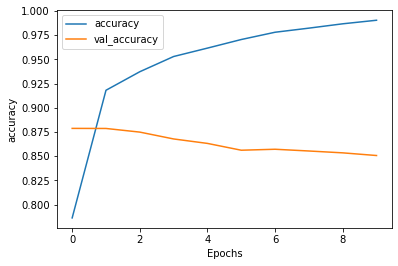

In [11]:
plot_graphs(history, 'accuracy')

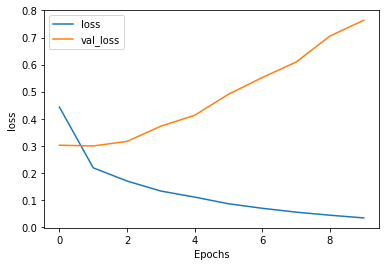

In [12]:
plot_graphs(history, 'loss')